In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv(r'E:\Data Science\ML Projects\ml project krish\notebook\Data\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
df.shape

(1000, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [20]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [22]:
print('Catagories in GENDER variable: ', end=' ')
print(df['gender'].unique())

print('Categories in RACE/ETHINICITY variable: ', end=' ')
print(df['race_ethnicity'].unique())

print('Categories in PARENTIAL_LEVEL_OF_EDUCATION variable: ', end=' ')
print(df['parental_level_of_education'].unique())

print('Categories in Lunch variable: ', end=' ')
print(df['lunch'].unique())

print('Categories in test prepararation course variable: ', end='  ')
print(df['test_preparation_course'].unique())


Catagories in GENDER variable:  ['female' 'male']
Categories in RACE/ETHINICITY variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in PARENTIAL_LEVEL_OF_EDUCATION variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in Lunch variable:  ['standard' 'free/reduced']
Categories in test prepararation course variable:   ['none' 'completed']


In [23]:
numeric_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns 
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} Categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [26]:
# Adding columns for Total score and Average 
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['total_score']/3
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
820,female,group A,some high school,standard,completed,85,90,92,267,89.000000
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
823,female,group B,high school,free/reduced,none,71,87,82,240,80.000000
446,male,group D,some college,free/reduced,none,69,66,60,195,65.000000
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [34]:
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score']==100]['Average'].count()
math_full = df[df['math_score']==100]['Average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [43]:
reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average'].count()
math_less_20 = df[df['math_score']<=20]['Average'].count()

print(f'Number of student with less than 20 marks in Math: {math_less_20}')
print(f'Number of student with less than 20 in writing: {writing_less_20}')
print(f'Number of student with less than 20 in Reading: {reading_less_20}')

Number of student with less than 20 marks in Math: 4
Number of student with less than 20 in writing: 3
Number of student with less than 20 in Reading: 1


<Axes: xlabel='Average', ylabel='Count'>

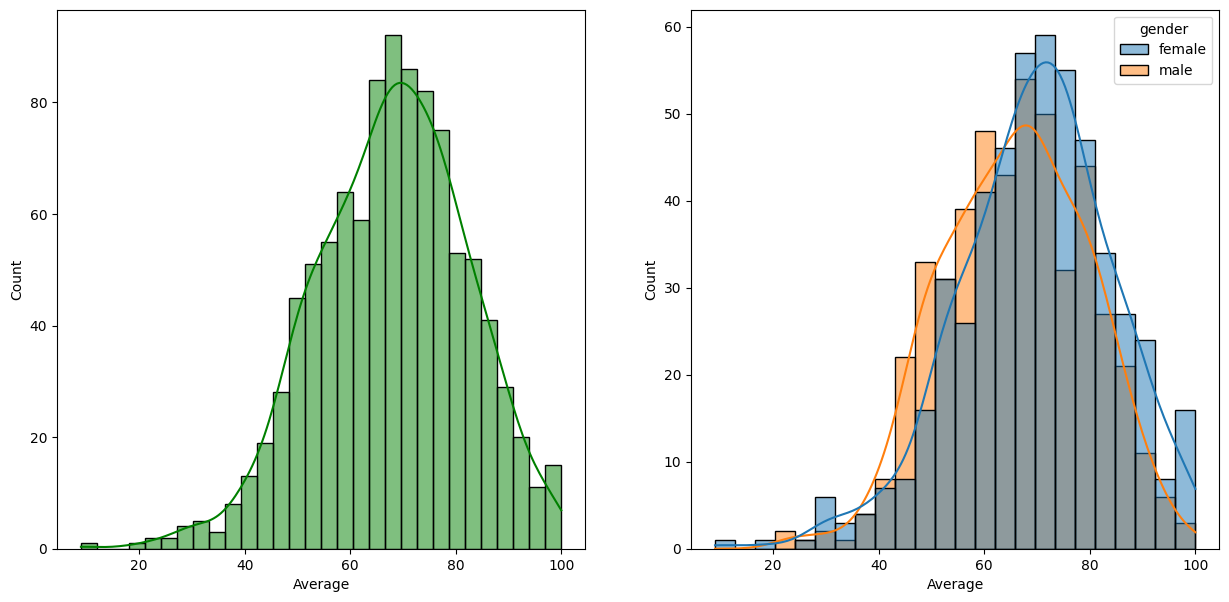

In [50]:
# visualzation 
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')

##### Insights: Female students tend to perform well than male students

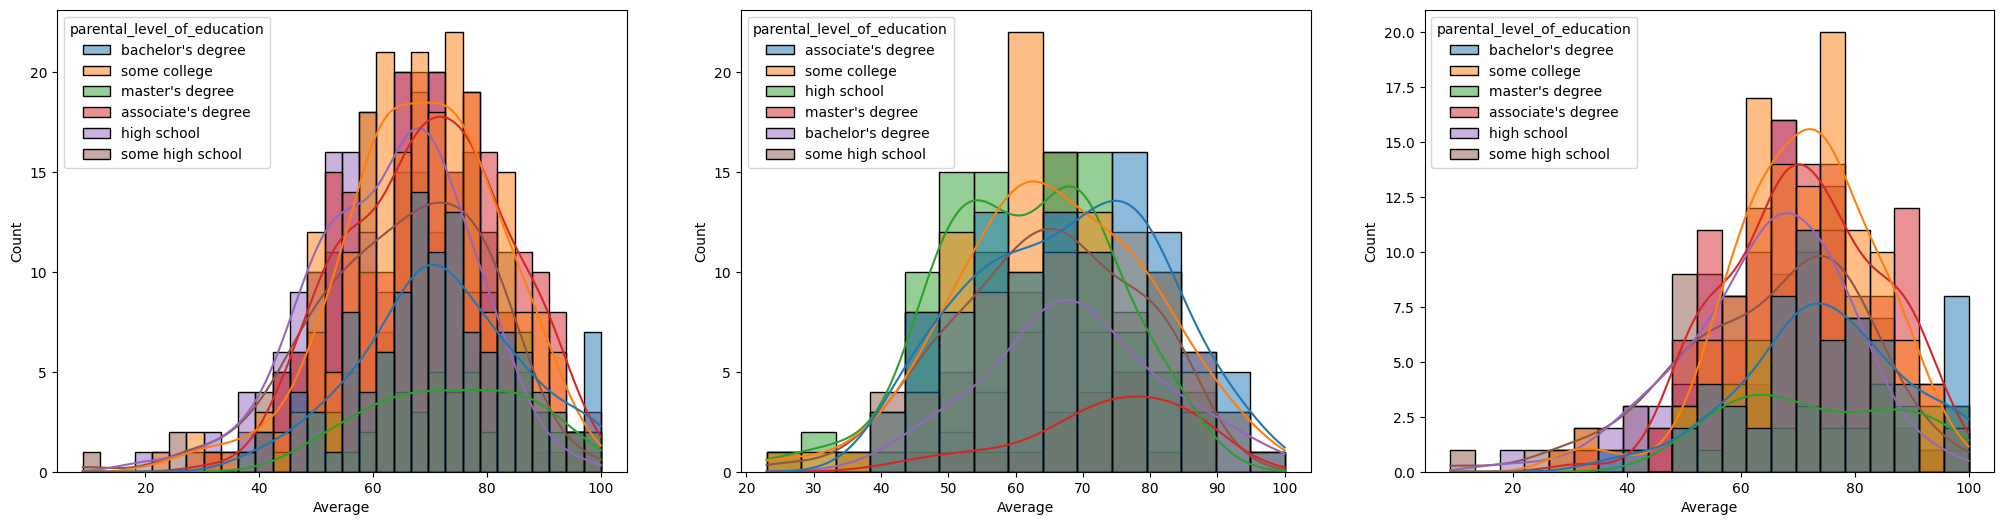

In [53]:
# visualzation 
plt.subplots(1,3, figsize=(25, 6))
plt.subplot(131)
ax=sns.histplot(data=df, x='Average', bins=30, kde=True, color='g', hue='parental_level_of_education')
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='parental_level_of_education')
plt.show()

<Axes: xlabel='Average', ylabel='Count'>

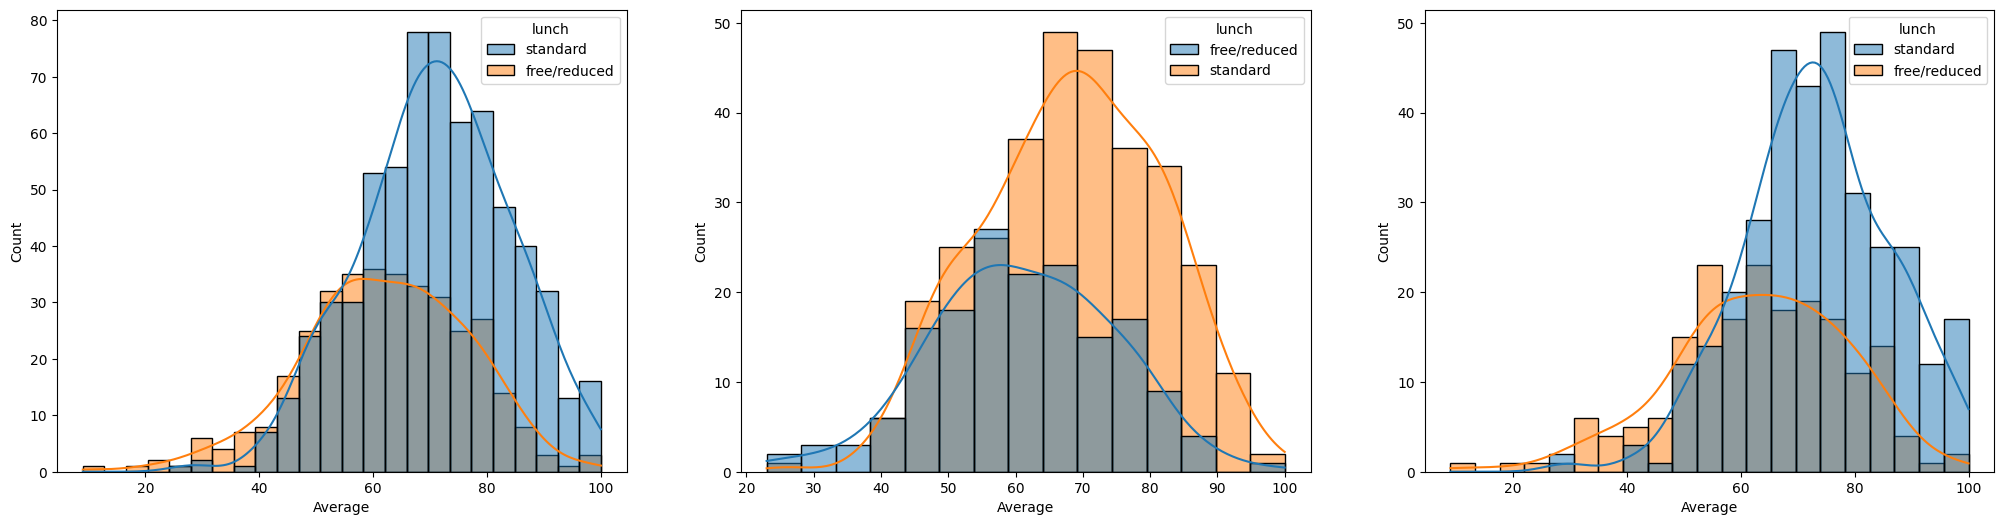

In [56]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='Average', hue='lunch', kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='Average', hue='lunch', kde=True)

##### Insights: Stnderd lunch perform well in exams, be it a male or female

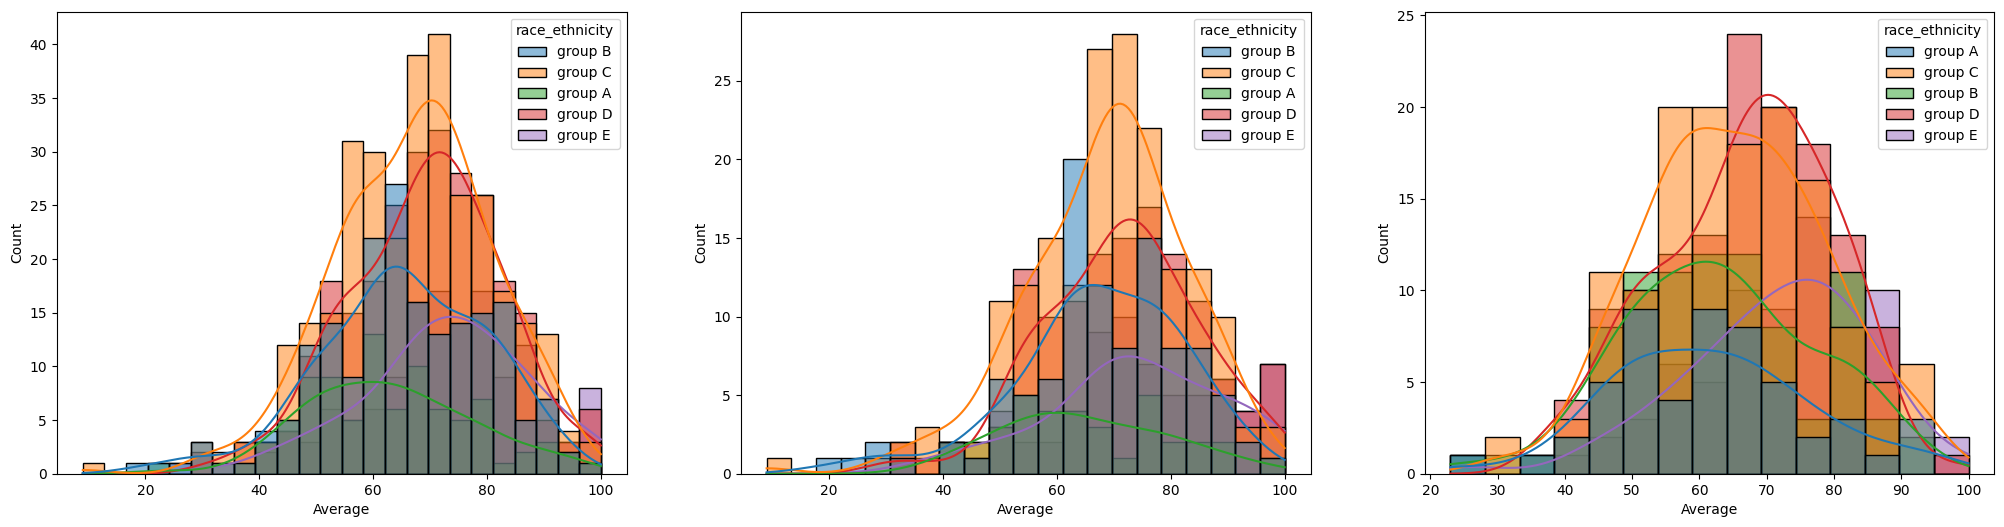

In [60]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

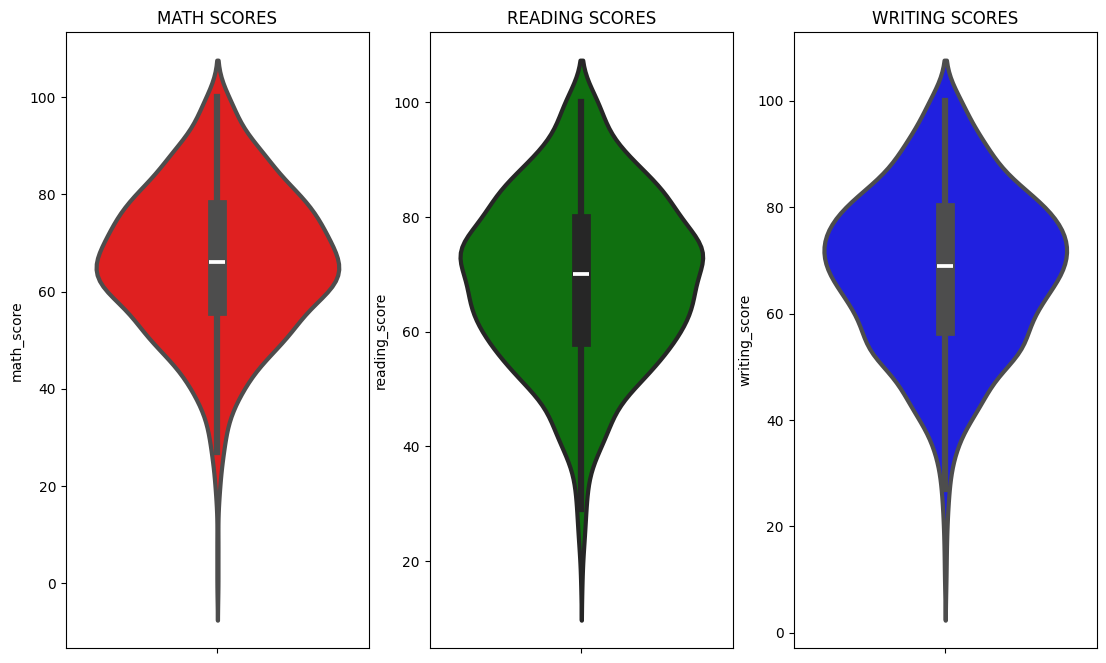

In [61]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [64]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


### 4.3 Multivariate analysis using pieplot

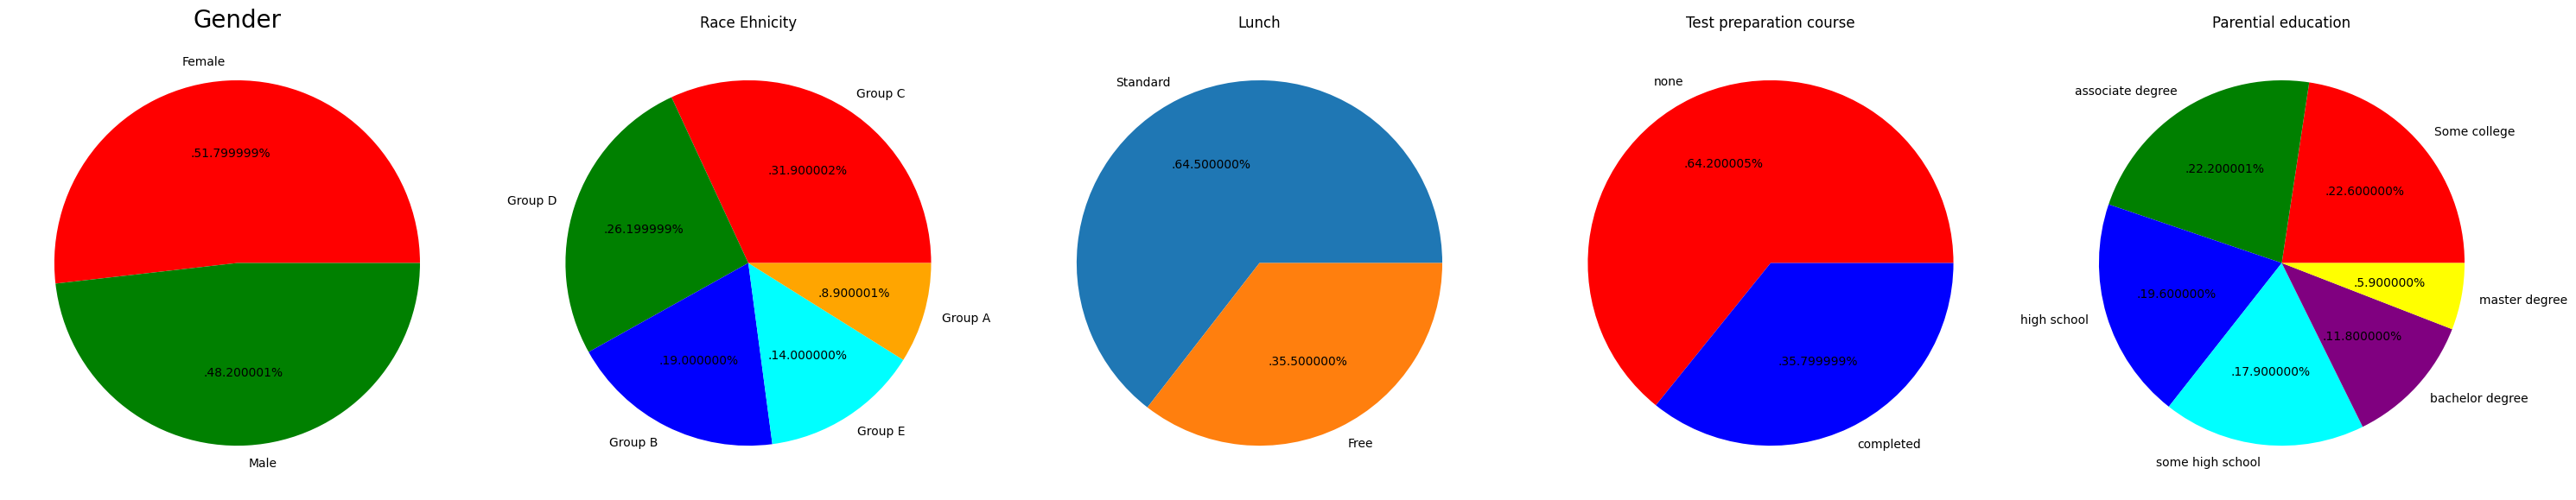

In [100]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color=['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race Ehnicity')
plt.axis('off')

size=df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.subplot(1,5,3)
plt.pie(size, labels=labels, autopct='.%2f%%')
plt.title('Lunch')
plt.axis('off')

size = df['test_preparation_course'].value_counts()
labels = 'none', 'completed'
color = ['red', 'blue']
plt.subplot(1,5,4)
plt.pie(size, labels=labels, colors=color, autopct='.%2f%%')
plt.axis('off')
plt.title('Test preparation course')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels = 'Some college', 'associate degree', 'high school', 'some high school', 'bachelor degree', 'master degree'
colors = ['red', 'green', 'blue', 'cyan', 'purple', 'yellow']
plt.pie(size, labels=labels, colors=colors, autopct='.%2f%%')
plt.title('Parential education')

plt.tight_layout()
plt.grid()
plt.show()

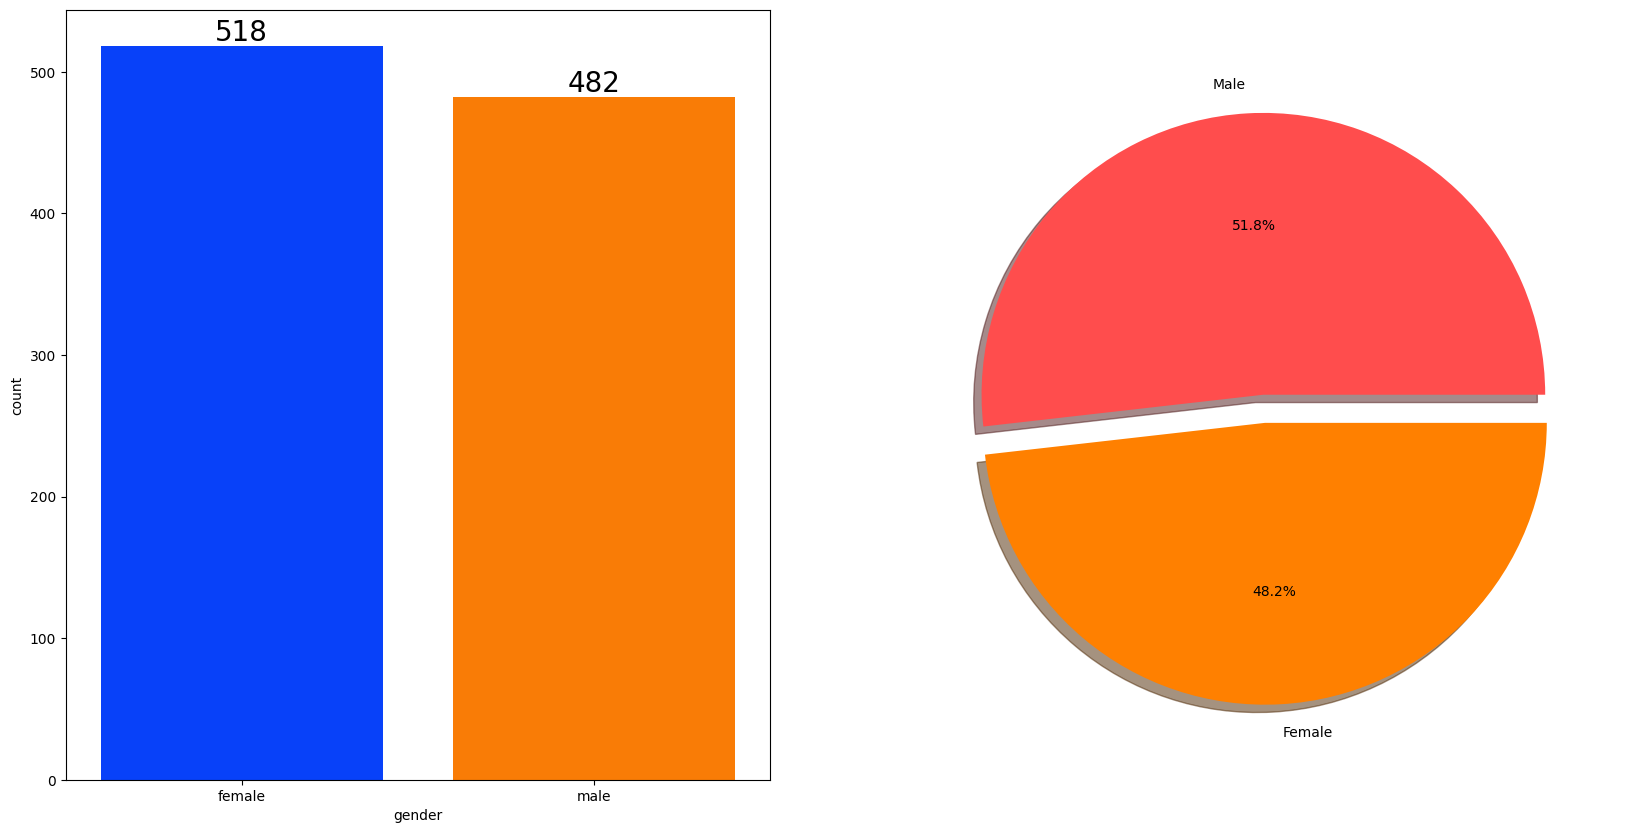

In [101]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()